# Accidents de trànsit a Catalunya

## Setup 

### Importem els moduls que necessitarem

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)


### Guardar les dades dels accidents a un df

In [4]:
AccidentsCOMPLET = pd.read_csv("dades/Accidents_de_tr_nsit_amb_morts_o_ferits_greus_a_Catalunya_20250131.csv")

AccidentsCOMPLET

,Any,zona,dat,via,pk,nomMun,nomCom,nomDem,F_MORTS,F_FERITS_GREUS,F_FERITS_LLEUS,F_VICTIMES,F_UNITATS_IMPLICADES,F_VIANANTS_IMPLICADES,F_BICICLETES_IMPLICADES,F_CICLOMOTORS_IMPLICADES,F_MOTOCICLETES_IMPLICADES,F_VEH_LLEUGERS_IMPLICADES,F_VEH_PESANTS_IMPLICADES,F_ALTRES_UNIT_IMPLICADES,F_UNIT_DESC_IMPLICADES,C_VELOCITAT_VIA,D_ACC_AMB_FUGA,D_BOIRA,D_CARACT_ENTORN,D_CARRIL_ESPECIAL,D_CIRCULACIO_MESURES_ESP,D_CLIMATOLOGIA,D_FUNC_ESP_VIA,D_GRAVETAT,D_INFLUIT_BOIRA,D_INFLUIT_CARACT_ENTORN,D_INFLUIT_CIRCULACIO,D_INFLUIT_ESTAT_CLIMA,D_INFLUIT_INTEN_VENT,D_INFLUIT_LLUMINOSITAT,D_INFLUIT_MESU_ESP,D_INFLUIT_OBJ_CALCADA,D_INFLUIT_SOLCS_RASES,D_INFLUIT_VISIBILITAT,D_INTER_SECCIO,D_LIMIT_VELOCITAT,D_LLUMINOSITAT,D_REGULACIO_PRIORITAT,D_SENTITS_VIA,D_SUBTIPUS_ACCIDENT,D_SUBTIPUS_TRAM,D_SUBZONA,D_SUPERFICIE,D_TIPUS_VIA,D_TITULARITAT_VIA,D_TRACAT_ALTIMETRIC,D_VENT,grupDiaLab,hor,grupHor,tipAcc,tipDia
0,2010,Zona urbana,25/01/2010,SE,999999,Cànoves i Samalús,Vallès Oriental,Barcelona,0,1,0,1,2,0,0,0,0,1,0,1,0,100.0,No,No n'hi ha,Desmunt,No n'hi ha,No n'hi ha,Bon temps,Sense funció especial,Accident greu,No,No,No,No,No,No,No,No,No,No,Arribant o eixint intersecció fins 50m,Genérica via,"De nit, il·luminació artificial suficient",Sols norma prioritat de pas,Un sol sentit,Encalç,Intersecció en T o Y,Zona urbana,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",Feiners,23.33,Nit,Col.lisió de vehicles en marxa,dill-dij
1,2010,Carretera,31/10/2010,N-240,"99,9",Lleida,Segrià,Lleida,0,1,3,4,1,0,0,0,0,1,0,0,0,40.0,No,No n'hi ha,A nivell,No n'hi ha,No n'hi ha,Bon temps,Sense funció especial,Accident greu,No,No,No,No,No,No,No,No,No,No,Dintre intersecció,Senyal velocitat,"De nit, il·luminació artificial suficient",Senyal Stop o cedeix pas,Doble sentit,Resta sortides de via,Giratòria,Carretera,Sec i net,Carretera convencional,Estatal,Pla,"Calma, vent molt suau",CapDeSetmana,1.00,Nit,Sortida de la calcada sense especificar,dg
2,2010,Carretera,17/05/2010,N-II,"708,7",Fornells de la Selva,Gironès,Girona,1,0,2,3,4,0,0,0,0,2,2,0,0,80.0,No,No n'hi ha,A nivell,No n'hi ha,No n'hi ha,Bon temps,Variant,Accident mortal,No,No,No,No,No,No,No,No,No,No,En secció,Senyal velocitat,"De dia, dia clar",NaN,Doble sentit,Col·lisió frontal,NaN,Carretera,Sec i net,Carretera convencional,Estatal,Rampa o pendent,"Calma, vent molt suau",Feiners,15.27,Tarda,Col.lisió de vehicles en marxa,dill-dij
3,2010,Zona urbana,21/08/2010,SE,999999,Barcelona,Barcelonès,Barcelona,0,2,7,9,2,0,0,0,0,2,0,0,0,100.0,No,No n'hi ha,Sense Especificar,No n'hi ha,No n'hi ha,Bon temps,Sense funció especial,Accident greu,No,No,No,No,No,No,No,No,No,No,Dintre intersecció,Genérica via,"De nit, il·luminació artificial suficient",Semàfor,Un sol sentit,Envestida (frontal lateral),Encreuament o intersecció en X o +,Zona urbana,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",CapDeSetmana,22.30,Nit,Col.lisió de vehicles en marxa,dis
4,2010,Zona urbana,07/05/2010,SE,999999,Badalona,Barcelonès,Barcelona,0,1,0,1,1,0,0,0,1,0,0,0,0,100.0,No,No n'hi ha,Sense Especificar,No n'hi ha,No n'hi ha,Bon temps,Sense funció especial,Accident greu,No,No,No,No,No,No,No,No,No,No,Dintre intersecció,Genérica via,"De dia, dia clar",Sols norma prioritat de pas,Un sol sentit,Caiguda en la via,Encreuament o intersecció en X o +,Zona urbana,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",CapDeSetmana,17.45,Tarda,Bolcada a la calcada,div
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24473,2023,Zona urbana,25/10/2023,C-250,"4,3",Quart,Gironès,Girona,0,1,0,1,1,0,0,0,1,0,0,0,0,999.0,No,No n'hi ha,Sense Especificar,NaN,No n'hi ha,Bon temps,Sense funció especial,Accident greu,No,No,No,No,No,No,No,No,No,No,Dintre intersecció,Genérica via,"De dia

## Accidents amb nom de via

Netejar dades d'Accidents per quedar-nos amb els que especifiquen via

In [4]:
AccidentsNomVia = AccidentsCOMPLET.drop(AccidentsCOMPLET[AccidentsCOMPLET['via'] == 'SE'].index)

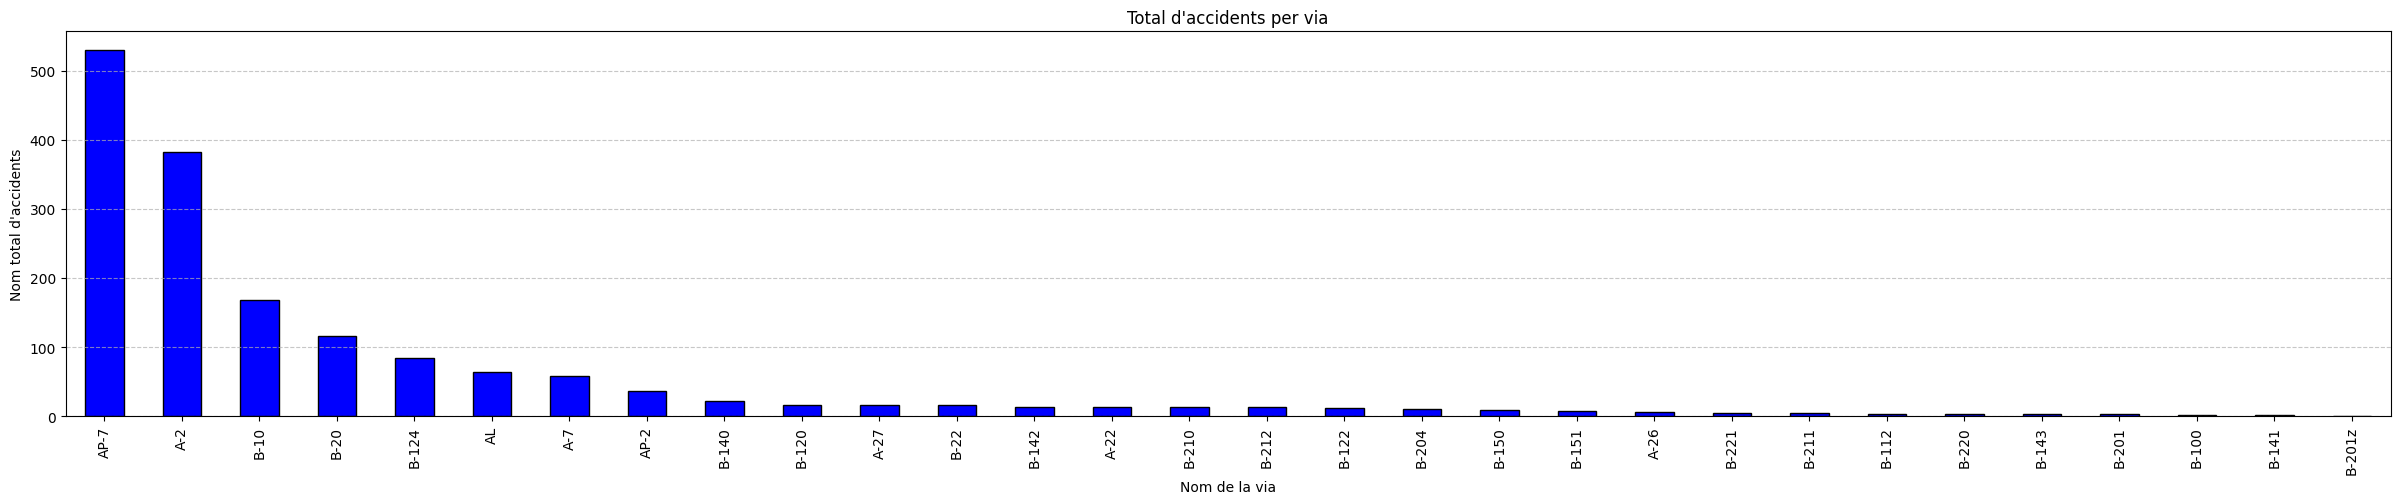

In [5]:
AccidentsPerVia = AccidentsNomVia.groupby('via').size().head(30)

plt.figure(figsize=(30, 5))
AccidentsPerVia.sort_values(ascending=False).plot(kind='bar', color='blue', edgecolor='black')

plt.xlabel('Nom de la via')
plt.ylabel('Nom total d\'accidents')
plt.title('Total d\'accidents per via')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


## Quantitat de victimes per via

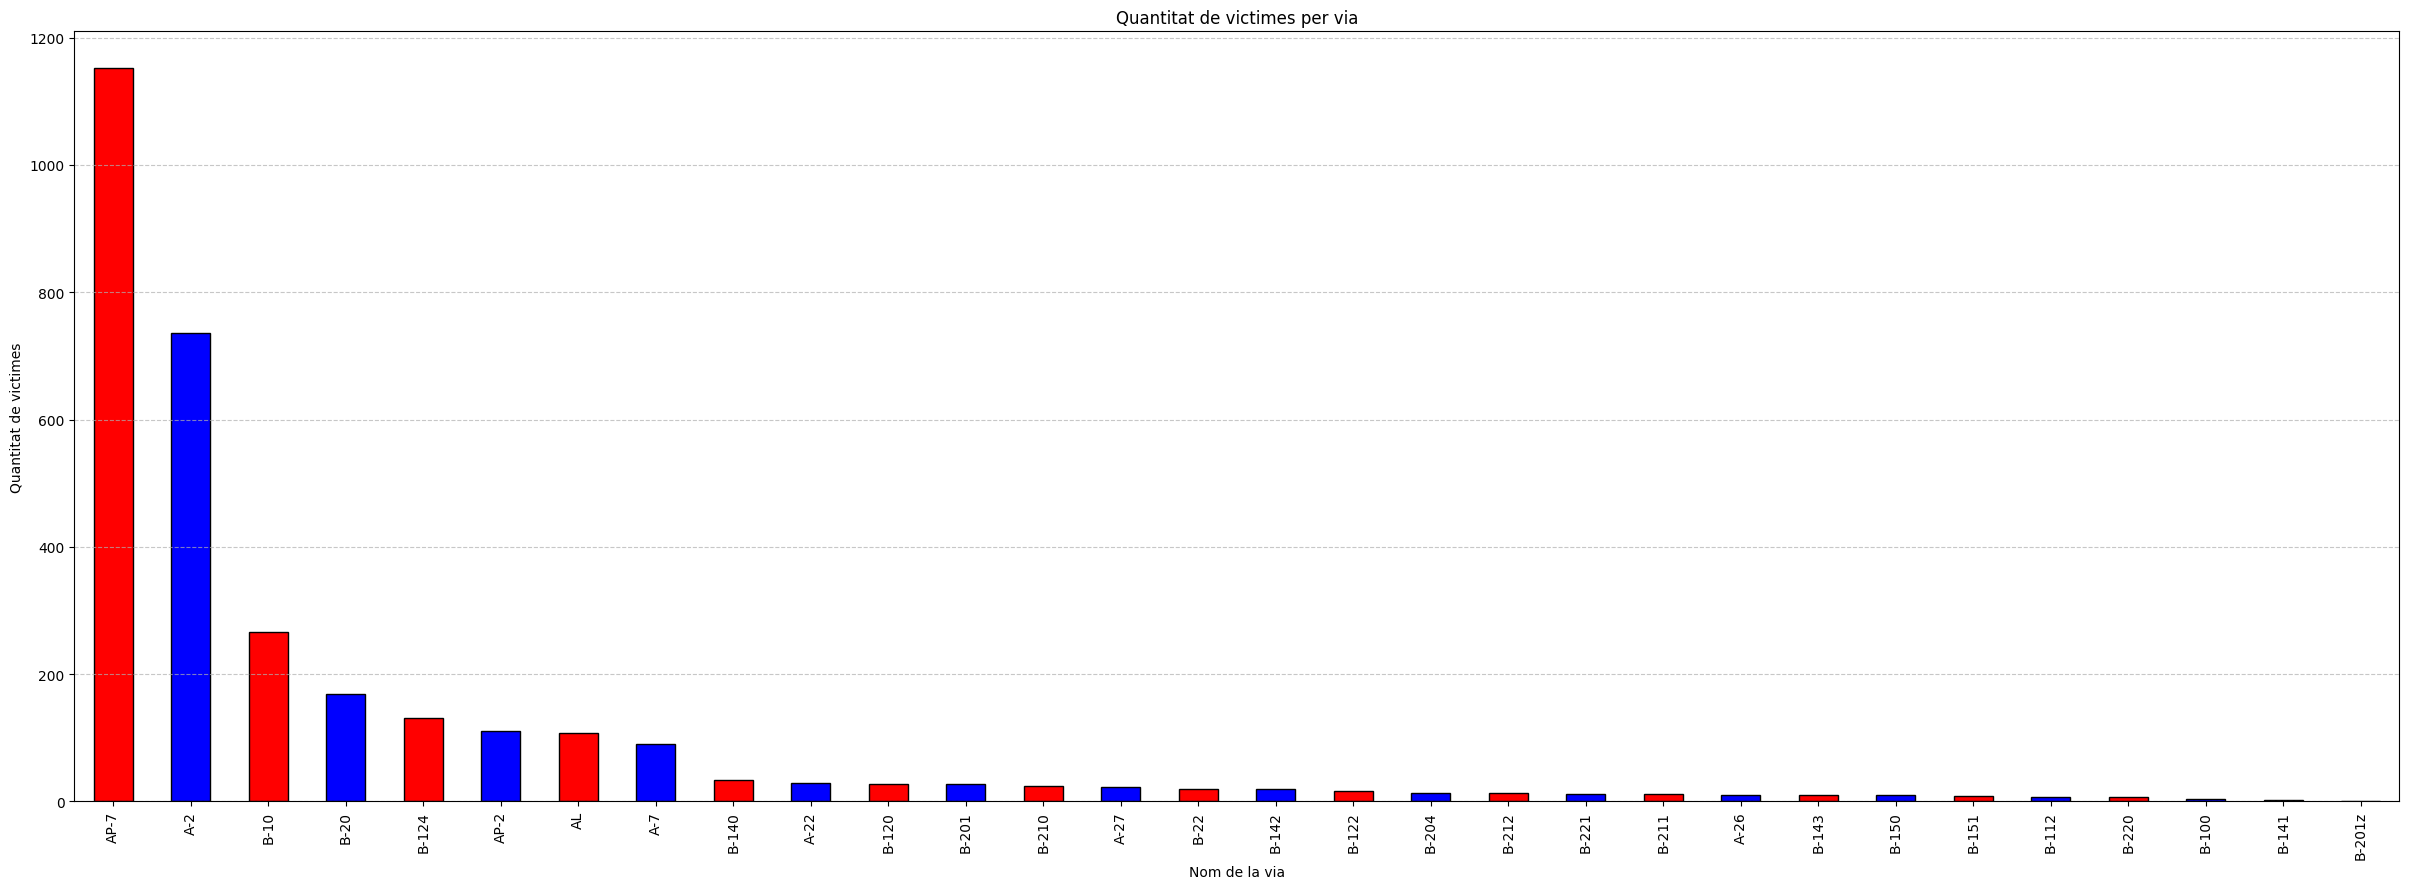

In [6]:
AccidentsNomViaGrafica = AccidentsNomVia.groupby('via')['F_VICTIMES'].sum().head(30)

plt.figure(figsize=(30, 10))
AccidentsNomViaGrafica.sort_values(ascending=False).plot(kind='bar',color=['red','blue'], edgecolor='black')

plt.xlabel('Nom de la via')
plt.ylabel('Quantitat de victimes')
plt.title('Quantitat de victimes per via')
plt.xticks(rotation=90) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



## Numero de vehicles implicats per numero de victimes

In [8]:
NumeroVehiclesImplicats = AccidentsCOMPLET.groupby('F_VICTIMES')['F_UNITATS_IMPLICADES'].sum()

NumeroVehiclesImplicats

F_VICTIMES
1     30410
2      9086
3      3148
4      1566
5       840
6       438
7       227
8       182
9        43
10       47
11       58
12       23
13       30
14       12
15        7
16        1
18       31
20        2
23        2
24        2
25        1
26        8
39        1
49        2
Name: F_UNITATS_IMPLICADES, dtype: int64

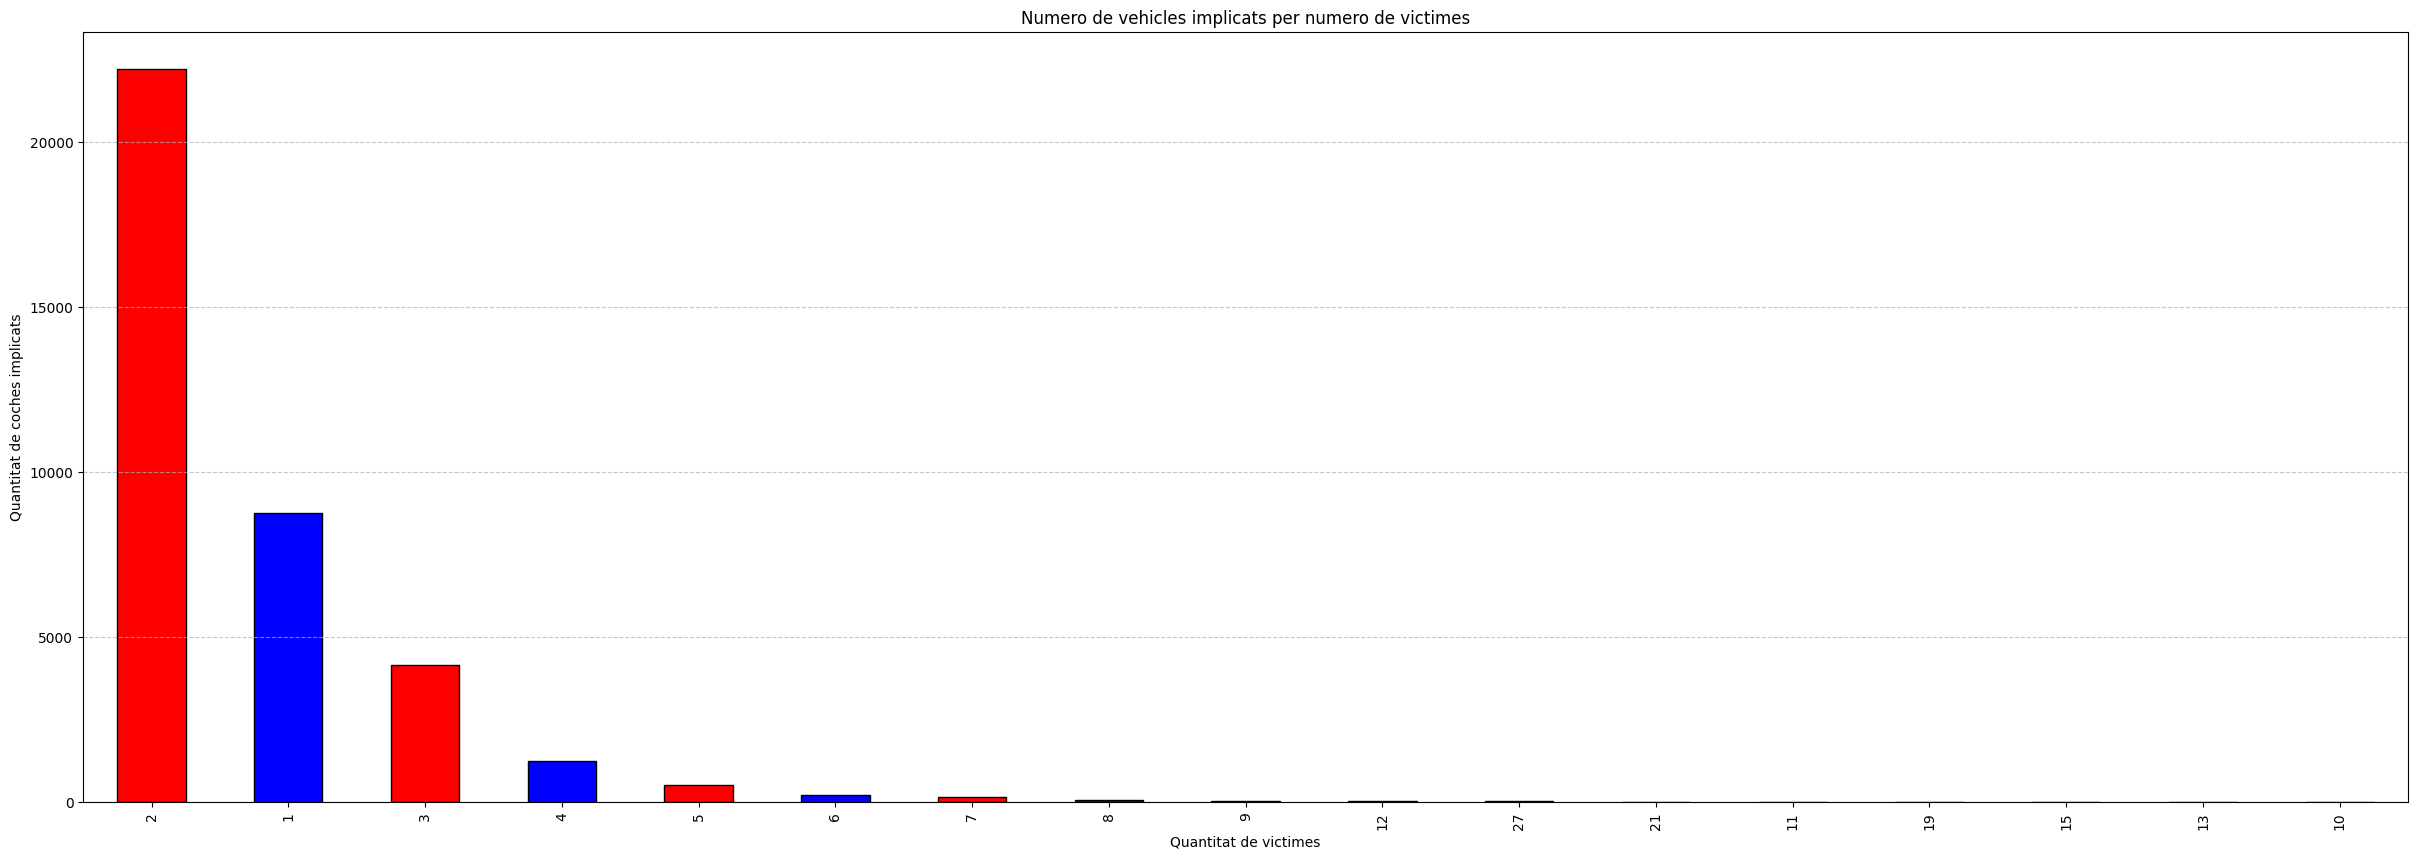

In [6]:
NumeroVehiclesImplicats = AccidentsCOMPLET.groupby('F_UNITATS_IMPLICADES')['F_VICTIMES'].sum()

plt.figure(figsize=(30, 10))
NumeroVehiclesImplicats.sort_values(ascending=False).plot(kind='bar',color=['red','blue'], edgecolor='black')

plt.xlabel('Quantitat de victimes')
plt.ylabel('Quantitat de coches implicats')
plt.title('Numero de vehicles implicats per numero de victimes')
plt.xticks(rotation=90) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

